In [1]:
# ich wollte es hier mal von unserem Datenset losgelöst auspobieren
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Allows jupyter to display plots inside notebooks
%matplotlib inline

# This will make Jupyter display the plots as vector graphics
%config InlineBackend.figure_format = 'svg'


In [2]:
#Datensatz mit 2 Spalten und ?? Reihen zufällig generieren
n_samples=10
data = np.random.random((n_samples, 2))
print(data)

data.max()

[[0.06508577 0.46582822]
 [0.78519372 0.09474375]
 [0.50006186 0.02939888]
 [0.53808212 0.49825078]
 [0.13258392 0.84378347]
 [0.69170819 0.0949028 ]
 [0.16179661 0.02952249]
 [0.53175641 0.723959  ]
 [0.50224079 0.18279028]
 [0.76980578 0.96166861]]


0.9616686060599391

In [5]:
data.shape

(10, 2)

In [6]:
f1=data[0:((n_samples)), 0]

In [7]:
print(f1)

[0.06508577 0.78519372 0.50006186 0.53808212 0.13258392 0.69170819
 0.16179661 0.53175641 0.50224079 0.76980578]


In [8]:
f2=data[0:((n_samples)),1]

In [9]:
print(f2)

[0.46582822 0.09474375 0.02939888 0.49825078 0.84378347 0.0949028
 0.02952249 0.723959   0.18279028 0.96166861]


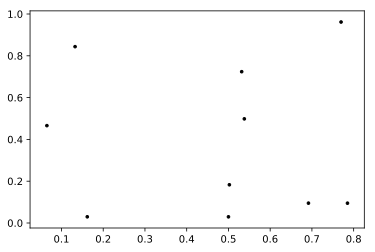

In [10]:
plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

In [11]:
print (X)

[[0.06508577 0.46582822]
 [0.78519372 0.09474375]
 [0.50006186 0.02939888]
 [0.53808212 0.49825078]
 [0.13258392 0.84378347]
 [0.69170819 0.0949028 ]
 [0.16179661 0.02952249]
 [0.53175641 0.723959  ]
 [0.50224079 0.18279028]
 [0.76980578 0.96166861]]


In [12]:
# number of clusters
k=4

#initialization, Coordinates of random centroids

#choose some points of the data

xAchsemax= f1.max()
xAchsemin = f1.min()

print(xAchsemax)
print(xAchsemin)

yAchsemax = f2.max()
yAchsemin = f2.min()

print(yAchsemax)
print(yAchsemin)

cx = np.random.randint(((xAchsemin)),((xAchsemax)),size=k)
cy = np.random.randint(((yAchsemin)),((yAchsemax)),size=k)


print(cx)
print(cy)

#Koordinaten der Punkte bestimmen




0.785193721989372
0.06508576748368622
0.9616686060599391
0.029398880008603023


ValueError: Range cannot be empty (low >= high) unless no samples are taken

In [13]:
# dieser Bereich ist hier leer, da zwischen 0 und 1 keine natürliche Zahl
# könnte man das so für unseren Datensatz verwenden?

In [14]:
# daher zufällige Zahl zwischen 0 und 1 auswählen -> Koordinaten der zufälligen Centroiden

cx1 = np.random.random((k,1))



cy1 = np.random.random((k,1))




C = np.array(list(zip(cx1, cy1)), dtype=np.float32)

print(C)

[[[0.00821403]
  [0.4113301 ]]

 [[0.88472307]
  [0.47904938]]

 [[0.91638637]
  [0.8534615 ]]

 [[0.7766927 ]
  [0.40777385]]]


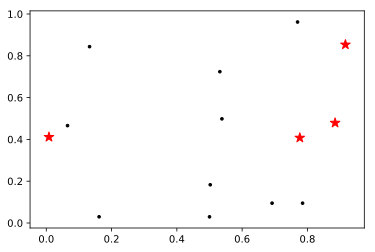

In [15]:
plt.scatter(f1,f2,c='black',s=7)

plt.scatter(cx1,cy1,marker='*',c='red',s=100)

In [16]:
# Distanz Punkte - Centroids berechnen
#dist = (((cx1-f1)**2 + (cy1-f2)**2)*0.5)

In [17]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [18]:
dist(X[1],C)

array([[0.8622479 , 0.32819859],
       [0.32191683, 0.87849767],
       [0.14789185, 1.118369  ],
       [0.3775156 , 0.75036138]])

In [19]:
clusters = np.zeros(len(X))

In [20]:
C_old = np.zeros(C.shape)

In [21]:
error = dist(C, C_old, None)

In [22]:
from copy import deepcopy

In [ ]:
while error != 0:
    for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == [i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)